In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 
#loading the data
# Step 2: Load the dataset
df = pd.read_csv("ev_sales.csv")

# Step 3: Check the first few rows
print(df.head())

# Step 4: Check for null values
print(df.isnull().sum())

# Step 5: Melt to long format
df_melted = df.melt(id_vars='Category', var_name='Year', value_name='Sales')

# Step 6: Convert types
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted['Sales'] = pd.to_numeric(df_melted['Sales'], errors='coerce')

# Step 7: Group total sales by category
category_sales = df_melted.groupby('Category')['Sales'].sum().sort_values(ascending=False)



  Category  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
0       3W     0     0    31    12     0     0     0     0     0     0
1       3W     0     0     0     0     0     0   112   390   545    51
2       2W     0     0     0     1     0     0     0     0     0     0
3       3W     0     1     1     0     0     0     0     0     0     0
4       3W     0     0     0     0    48    66    43    68   266   578
Category    0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
2022        0
2023        0
2024        0
dtype: int64


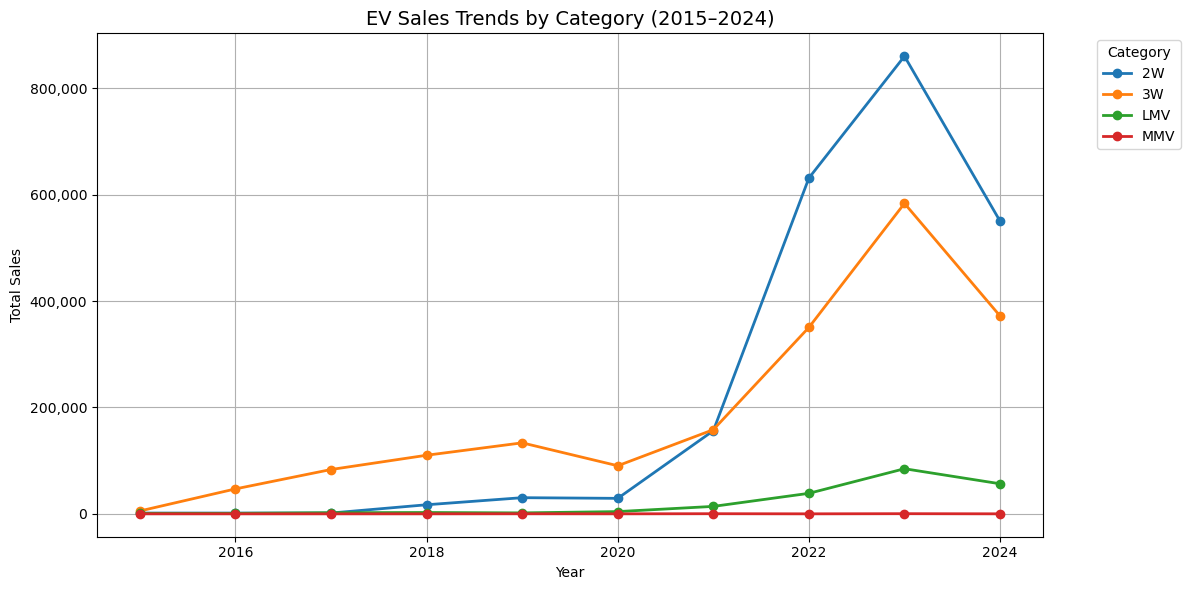

In [54]:
# Step 1: Group sales by Year and Category
sales_by_year = df_melted.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Step 2: Pivot the data for plotting
sales_pivot = sales_by_year.pivot(index='Year', columns='Category', values='Sales').fillna(0)

# Step 3: Plot trends
plt.figure(figsize=(12, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[category], marker='o', linewidth=2, label=category)

# Add formatting
plt.title("EV Sales Trends by Category (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

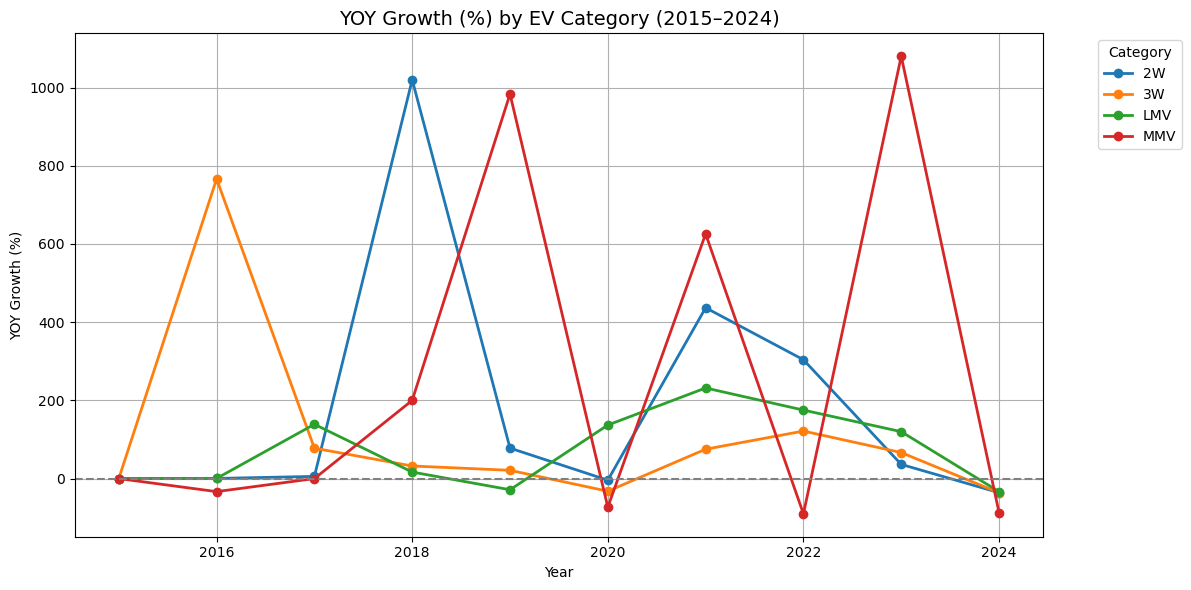

In [56]:
# Step 1: Calculate YOY growth (% change)
yoy_growth = sales_pivot.pct_change().fillna(0) * 100  # Convert to percentage

# Step 2: Plot YOY growth trends
plt.figure(figsize=(12, 6))
for category in yoy_growth.columns:
    plt.plot(yoy_growth.index, yoy_growth[category], marker='o', linewidth=2, label=category)

# Step 3: Formatting
plt.title("YOY Growth (%) by EV Category (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("YOY Growth (%)")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')  # baseline at 0%
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [58]:
df_state = pd.read_csv("EV_Dataset.csv")  # Replace with your file name

# Preview the data
print(df_state.head())
print(df_state.isnull().sum())

   Year           State Vehicle_Category  EV_Sales_Quantity
0  2014  Andhra Pradesh           Others                  0
1  2014  Andhra Pradesh           Others                  0
2  2014  Andhra Pradesh           Others                  0
3  2014  Andhra Pradesh           Others                  0
4  2014  Andhra Pradesh              Bus                  0
Year                 0
State                0
Vehicle_Category     0
EV_Sales_Quantity    0
dtype: int64


C:\Users\salon\AppData\Local\Temp\ipykernel_6236\1606361572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.head(10).values, y=state_sales.head(10).index, palette='viridis')


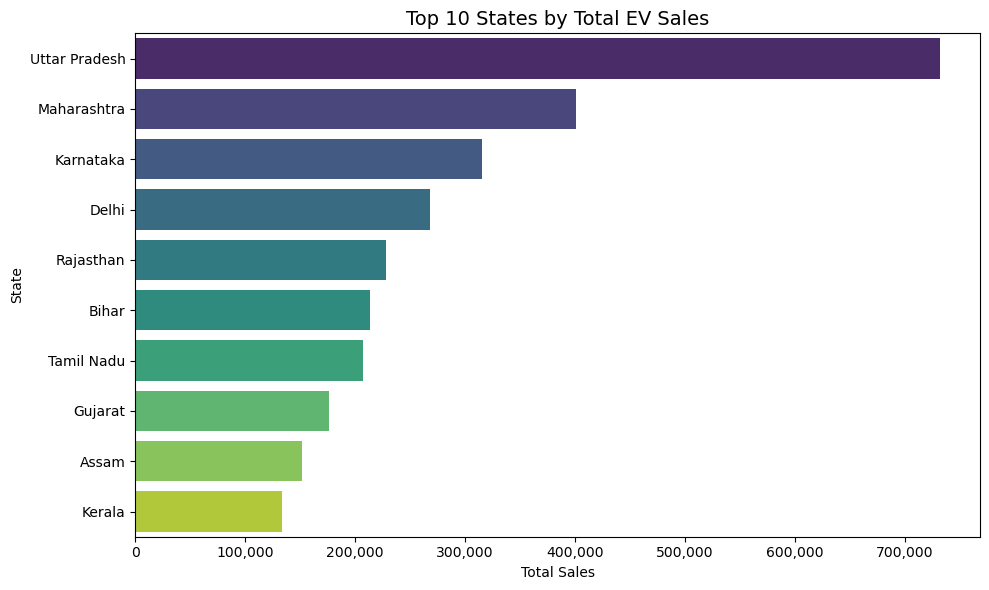

In [60]:
state_sales = df_state.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Bar plot: Top 10 states by total EV sales
plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.head(10).values, y=state_sales.head(10).index, palette='viridis')

plt.title("Top 10 States by Total EV Sales", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


            State Vehicle_Category  EV_Sales_Quantity
31  Uttar Pradesh               3W             641906
19    Maharashtra               2W             342236
15      Karnataka               2W             278671
4           Bihar               3W             184394
29     Tamil Nadu               2W             181735
8           Delhi               3W             161868
10        Gujarat               2W             157871
3           Assam               3W             145575
27      Rajasthan               2W             137724
16         Kerala               2W             108118


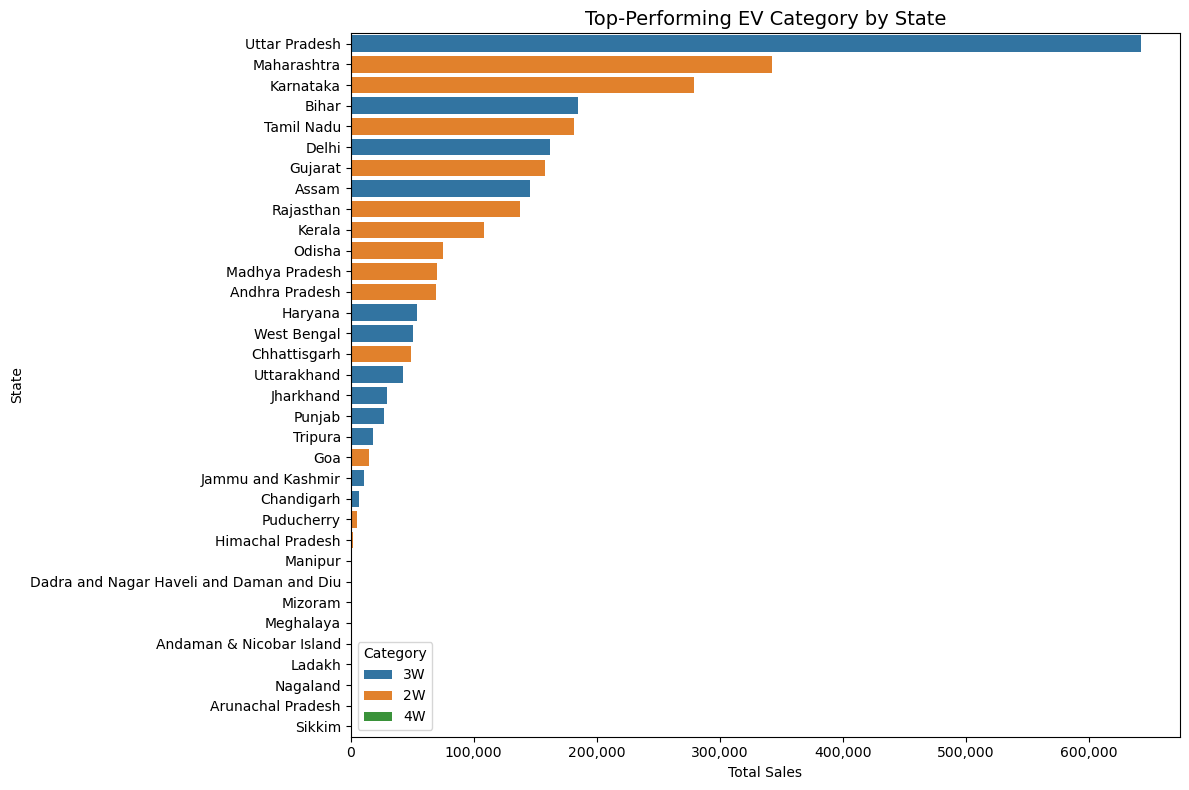

In [62]:
# Step 1: Group total sales by State and Category
grouped = df_state.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

# Step 2: Find the top-performing category per state
top_categories = grouped.loc[grouped.groupby('State')['EV_Sales_Quantity'].idxmax()].reset_index(drop=True)

# Step 3: Display the top category for each state
print(top_categories.sort_values(by='EV_Sales_Quantity', ascending=False).head(10))  # Top 10 states


plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories.sort_values(by='EV_Sales_Quantity', ascending=False), 
            y='State', x='EV_Sales_Quantity', hue='Vehicle_Category', dodge=False)

plt.title("Top-Performing EV Category by State", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [63]:
# Prepare a feature matrix: rows = states, columns = category sales
features = df_state.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack().fillna(0)

# Optional: Add % share of each category
features_percent = features.div(features.sum(axis=1), axis=0)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Create features: Total sales by State and Category
features = df_state.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack().fillna(0)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(X_pca)

C:\Users\salon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [78]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
print(features.columns)

Index(['2W', '3W', '4W', 'Bus', 'Others', 'Cluster'], dtype='object', name='Vehicle_Category')


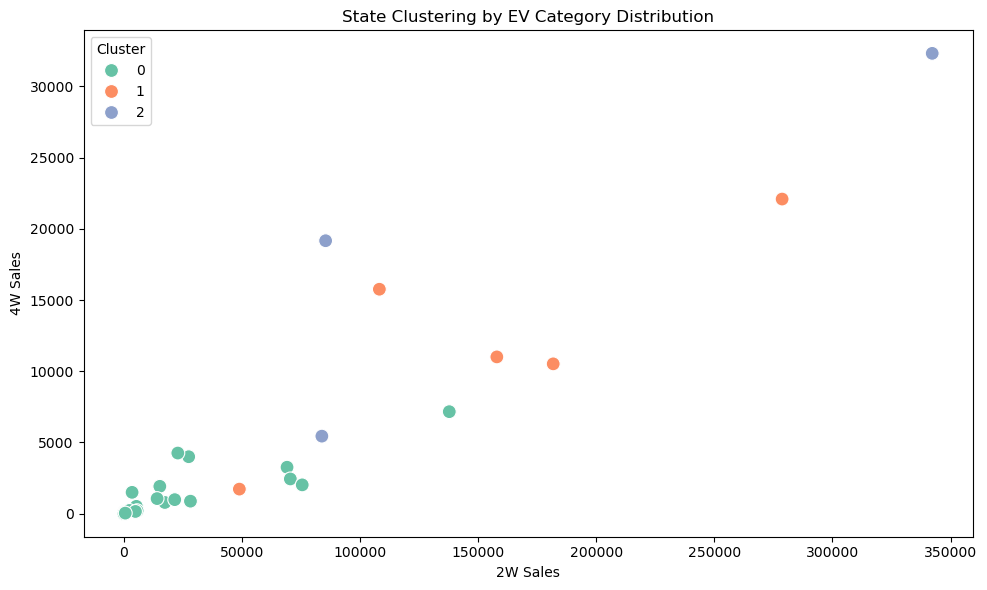

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['2W'], y=features['4W'], hue=features['Cluster'], palette='Set2', s=100)

plt.title("State Clustering by EV Category Distribution")
plt.xlabel("2W Sales")
plt.ylabel("4W Sales")
plt.tight_layout()
plt.show()

In [90]:
print(cluster_info['Cluster'].value_counts())

Cluster
0    26
1     5
2     3
Name: count, dtype: int64


In [96]:
# Define a mapping
cluster_labels = {
    0: "Urban 2W Market",
    1: "Balanced 2W/4W Market",
    2: "3W-Dominated Region"
}

# Add readable labels to DataFrame
features['Cluster_Label'] = features['Cluster'].map(cluster_labels)

# Display with state and new cluster label
features.reset_index()[['State', 'Cluster_Label']].sort_values(by='Cluster_Label')

Vehicle_Category,State,Cluster_Label
8,Delhi,3W-Dominated Region
19,Maharashtra,3W-Dominated Region
31,Uttar Pradesh,3W-Dominated Region
29,Tamil Nadu,Balanced 2W/4W Market
6,Chhattisgarh,Balanced 2W/4W Market
10,Gujarat,Balanced 2W/4W Market
15,Karnataka,Balanced 2W/4W Market
16,Kerala,Balanced 2W/4W Market
30,Tripura,Urban 2W Market
28,Sikkim,Urban 2W Market
